### Reaction  `A + B <-> C` in 2-D, mostly forward and with 1st-order kinetics for each species, taken to equilibrium

Initial concentrations of `A` and `B` are spacially separated to the opposite ends of the system;
as a result, no `C` is being generated.

But, as soon as `A` and `B`, from their respective distant originating points at the oppposite corners, 
diffuse into the middle - and into each other - the reaction starts,
consuming both `A` and `B` (the forward reaction is much more substantial than the reverse one),
until an equilibrium is reached in both diffusion and reactions.

Note: This is a 2D version of the 1D experiment by the same name.

# TODO: 1) respect declared plot colors in the heatmaps

### TAGS :  "reactions 2D", "diffusion 2D"

In [1]:
LAST_REVISED = "Jan. 8, 2025"
LIFE123_VERSION = "1.0.0rc2"        # Library version this experiment is based on

In [2]:
#import set_path                    # Using MyBinder?  Uncomment this before running the next cell!

In [3]:
#import sys
#sys.path.append("C:/some_path/my_env_or_install")   # CHANGE to the folder containing your venv or libraries installation!
# NOTE: If any of the imports below can't find a module, uncomment the lines above, or try:  import set_path

from life123 import check_version, BioSim2D, ChemData, UniformCompartment

In [4]:
check_version(LIFE123_VERSION)

OK


In [5]:
# Initialize the system
chem_data = ChemData(names=["A", "B", "C"], diffusion_rates=[50., 50., 1.],
                     plot_colors=['red', 'orange', 'green'])

uc = UniformCompartment(chem_data=chem_data)

# Reaction A + B <-> C , with 1st-order kinetics for each species; note that it's mostly in the forward direction
uc.add_reaction(reactants=["A", "B"], products="C", forward_rate=20., reverse_rate=2.)
uc.describe_reactions()

Number of reactions: 1 (at temp. 25 C)
0: A + B <-> C  (kF = 20 / kR = 2 / delta_G = -5,708 / K = 10) | 1st order in all reactants & products
Set of chemicals involved in the above reactions: {"A" (red), "B" (orange), "C" (green)}


In [6]:
bio = BioSim2D(n_bins=(7, 7), reaction_handler=uc)

# TIME 0 : Inject initial concentrations of `A` and `B` at opposite ends of the system

In [7]:
bio.set_bin_conc(bin_x = 0, bin_y = 0, chem_label="A", conc=20.)
bio.set_bin_conc(bin_x = 6, bin_y = 6, chem_label="B", conc=20.)

bio.describe_state()

SYSTEM STATE at Time t = 0:
Species `A`:
      0    1    2    3    4    5    6
0  20.0  0.0  0.0  0.0  0.0  0.0  0.0
1   0.0  0.0  0.0  0.0  0.0  0.0  0.0
2   0.0  0.0  0.0  0.0  0.0  0.0  0.0
3   0.0  0.0  0.0  0.0  0.0  0.0  0.0
4   0.0  0.0  0.0  0.0  0.0  0.0  0.0
5   0.0  0.0  0.0  0.0  0.0  0.0  0.0
6   0.0  0.0  0.0  0.0  0.0  0.0  0.0
Species `B`:
     0    1    2    3    4    5     6
0  0.0  0.0  0.0  0.0  0.0  0.0   0.0
1  0.0  0.0  0.0  0.0  0.0  0.0   0.0
2  0.0  0.0  0.0  0.0  0.0  0.0   0.0
3  0.0  0.0  0.0  0.0  0.0  0.0   0.0
4  0.0  0.0  0.0  0.0  0.0  0.0   0.0
5  0.0  0.0  0.0  0.0  0.0  0.0   0.0
6  0.0  0.0  0.0  0.0  0.0  0.0  20.0
Species `C`:
     0    1    2    3    4    5    6
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0


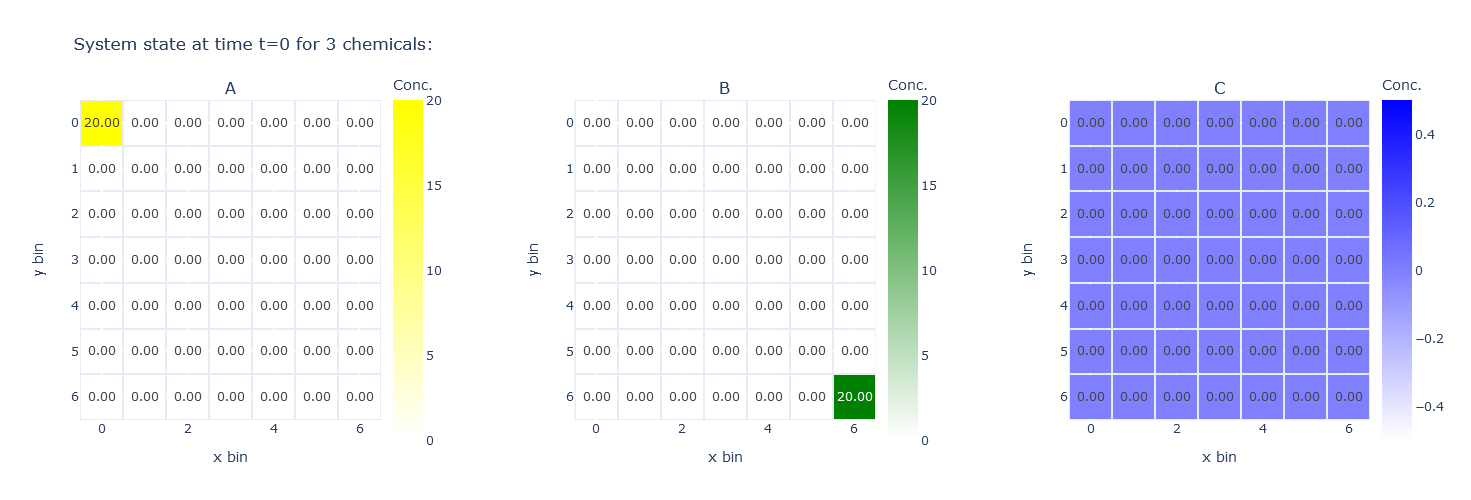

In [8]:
bio.system_heatmaps()

## Enable History

In [9]:
# Let's take a peek at the current concentrations of all chemicals in the bin with the initial concentration injections, as well as at the bin in the very center
bio.selected_concentrations(bins=[(0,0), (6,6), (3,3)])

{(0, 0): {'A': 20.0, 'B': 0.0, 'C': 0.0},
 (6, 6): {'A': 0.0, 'B': 20.0, 'C': 0.0},
 (3, 3): {'A': 0.0, 'B': 0.0, 'C': 0.0}}

In [10]:
# Let's enable history for those 3 bins
bio.enable_history(bins=[(0,0), (6,6), (3,3)])

In [11]:
# Enabling history has the effect of taking a snapshot; let's take a look at it
bio.conc_history.history.get_collection()

[(0,
  {(0, 0): {'A': 20.0, 'B': 0.0, 'C': 0.0},
   (6, 6): {'A': 0.0, 'B': 20.0, 'C': 0.0},
   (3, 3): {'A': 0.0, 'B': 0.0, 'C': 0.0}},
  '')]

### Part 1 : advance to time t=0.002 (with smaller fixed steps)

In [12]:
bio.react_diffuse(total_duration=0.002, n_steps=10)
bio.describe_state()

SYSTEM STATE at Time t = 0.002:
Species `A`:
              0             1             2             3             4  \
0  1.649086e+01  1.602863e+00  7.282844e-02  1.980644e-03  3.549559e-05   
1  1.602863e+00  1.416999e-01  5.764607e-03  1.380506e-04  2.133275e-06   
2  7.282844e-02  5.764607e-03  2.059840e-04  4.240362e-06  5.474009e-08   
3  1.980644e-03  1.380506e-04  4.240362e-06  7.288416e-08  7.538720e-10   
4  3.549559e-05  2.133275e-06  5.474009e-08  7.538720e-10  5.855018e-12   
5  4.371320e-07  2.201919e-08  4.530362e-10  4.685646e-12  2.428436e-14   
6  3.765173e-09  1.523634e-10  2.352681e-12  1.621799e-14  4.200000e-17   

              5             6  
0  4.371320e-07  3.765173e-09  
1  2.201919e-08  1.523634e-10  
2  4.530362e-10  2.352681e-12  
3  4.685646e-12  1.621799e-14  
4  2.428436e-14  4.200000e-17  
5  5.040000e-17  0.000000e+00  
6  0.000000e+00  0.000000e+00  
Species `B`:
              0             1             2             3             4  \
0  0.00000

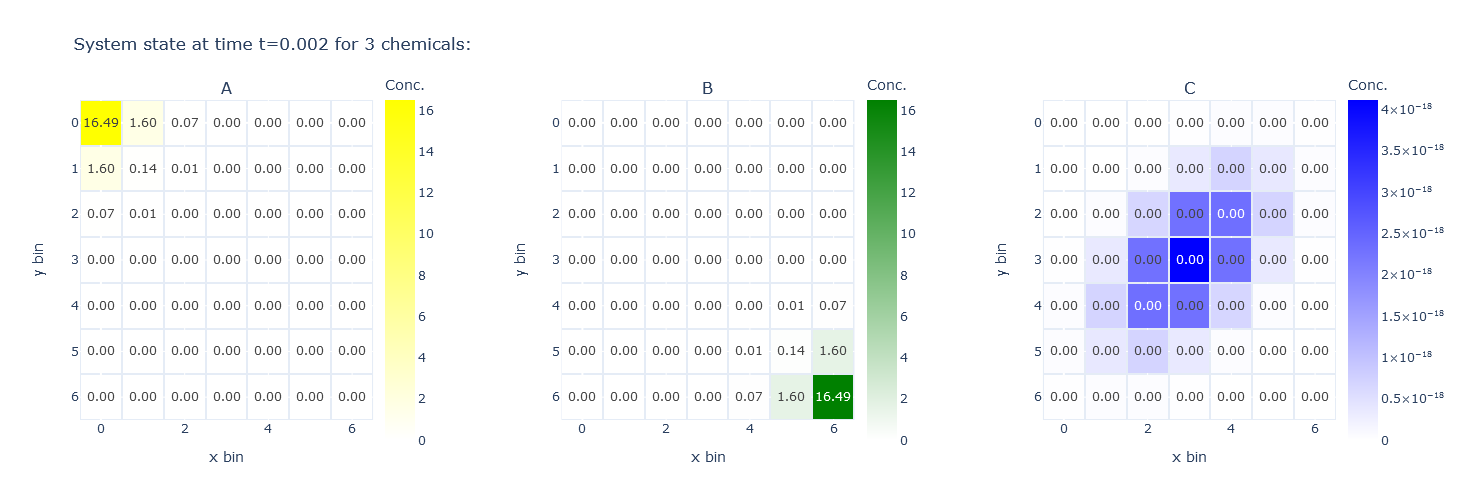

In [13]:
bio.system_heatmaps()

In [14]:
# Let's take a peek at the history saved so far; we'll plot it at the end
# Each list entry is a triplet of the form (time, data, caption)     Note: this is a low-level data structure, typically not directly interacted with by the end user
bio.conc_history.history.get_collection()

[(0,
  {(0, 0): {'A': 20.0, 'B': 0.0, 'C': 0.0},
   (6, 6): {'A': 0.0, 'B': 20.0, 'C': 0.0},
   (3, 3): {'A': 0.0, 'B': 0.0, 'C': 0.0}},
  ''),
 (0.0002,
  {(0, 0): {'A': 19.6, 'B': 0.0, 'C': 0.0},
   (6, 6): {'A': 0.0, 'B': 19.6, 'C': 0.0},
   (3, 3): {'A': 0.0, 'B': 0.0, 'C': 0.0}},
  ''),
 (0.0004,
  {(0, 0): {'A': 19.212, 'B': 0.0, 'C': 0.0},
   (6, 6): {'A': 0.0, 'B': 19.212, 'C': 0.0},
   (3, 3): {'A': 0.0, 'B': 0.0, 'C': 0.0}},
  ''),
 (0.0006000000000000001,
  {(0, 0): {'A': 18.83556, 'B': 0.0, 'C': 0.0},
   (6, 6): {'A': 0.0, 'B': 18.83556, 'C': 0.0},
   (3, 3): {'A': 0.0, 'B': 0.0, 'C': 0.0}},
  ''),
 (0.0008,
  {(0, 0): {'A': 18.470258400000002, 'B': 0.0, 'C': 0.0},
   (6, 6): {'A': 0.0, 'B': 18.470258400000002, 'C': 0.0},
   (3, 3): {'A': 0.0, 'B': 0.0, 'C': 0.0}},
  ''),
 (0.001,
  {(0, 0): {'A': 18.115691152000004, 'B': 0.0, 'C': 0.0},
   (6, 6): {'A': 0.0, 'B': 18.115691152000004, 'C': 0.0},
   (3, 3): {'A': 0.0, 'B': 0.0, 'C': 0.0}},
  ''),
 (0.0012000000000000001,
  {(

In [15]:
# A more readable extraction of the historical data in one of the corner bins
bio.conc_history.bin_history(bin_address = (0,0))

SYSTEM TIME          A    B    C
0        0.0000  20.000000  0.0  0.0
1        0.0002  19.600000  0.0  0.0
2        0.0004  19.212000  0.0  0.0
3        0.0006  18.835560  0.0  0.0
4        0.0008  18.470258  0.0  0.0
5        0.0010  18.115691  0.0  0.0
6        0.0012  17.771471  0.0  0.0
7        0.0014  17.437226  0.0  0.0
8        0.0016  17.112602  0.0  0.0
9        0.0018  16.797255  0.0  0.0
10       0.0020  16.490859  0.0  0.0

In [16]:
# And in the central bin
bio.conc_history.bin_history(bin_address = (3,3))

SYSTEM TIME             A             B             C
0        0.0000  0.000000e+00  0.000000e+00  0.000000e+00
1        0.0002  0.000000e+00  0.000000e+00  0.000000e+00
2        0.0004  0.000000e+00  0.000000e+00  0.000000e+00
3        0.0006  0.000000e+00  0.000000e+00  0.000000e+00
4        0.0008  0.000000e+00  0.000000e+00  0.000000e+00
5        0.0010  0.000000e+00  0.000000e+00  0.000000e+00
6        0.0012  4.000000e-10  4.000000e-10  0.000000e+00
7        0.0014  2.702000e-09  2.702000e-09  6.400000e-22
8        0.0016  1.043070e-08  1.043070e-08  2.984245e-20
9        0.0018  3.020255e-08  3.020255e-08  4.650134e-19
10       0.0020  7.288416e-08  7.288416e-08  4.113414e-18

### Part 2 : continue advancing the simulation, with occasional visualization of system snapshots as heatmaps

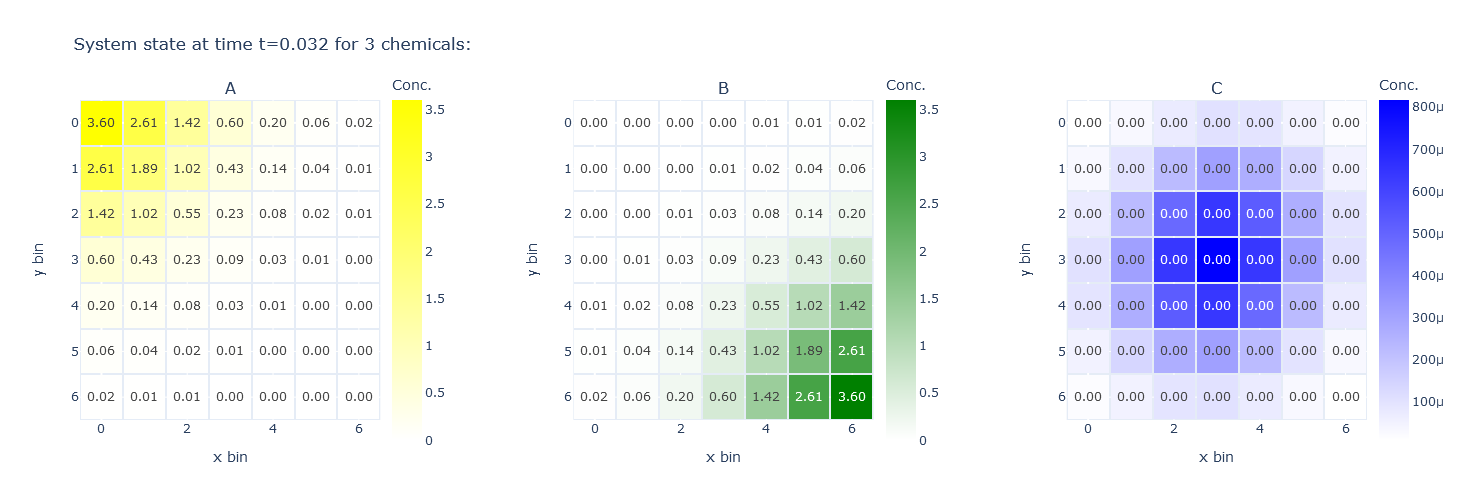

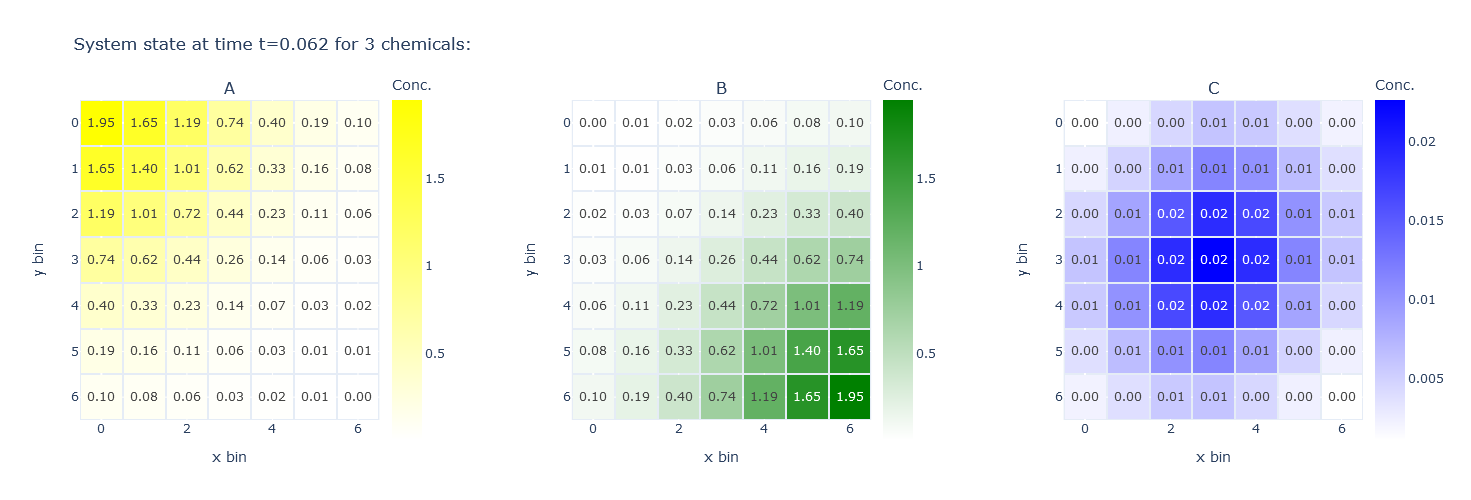

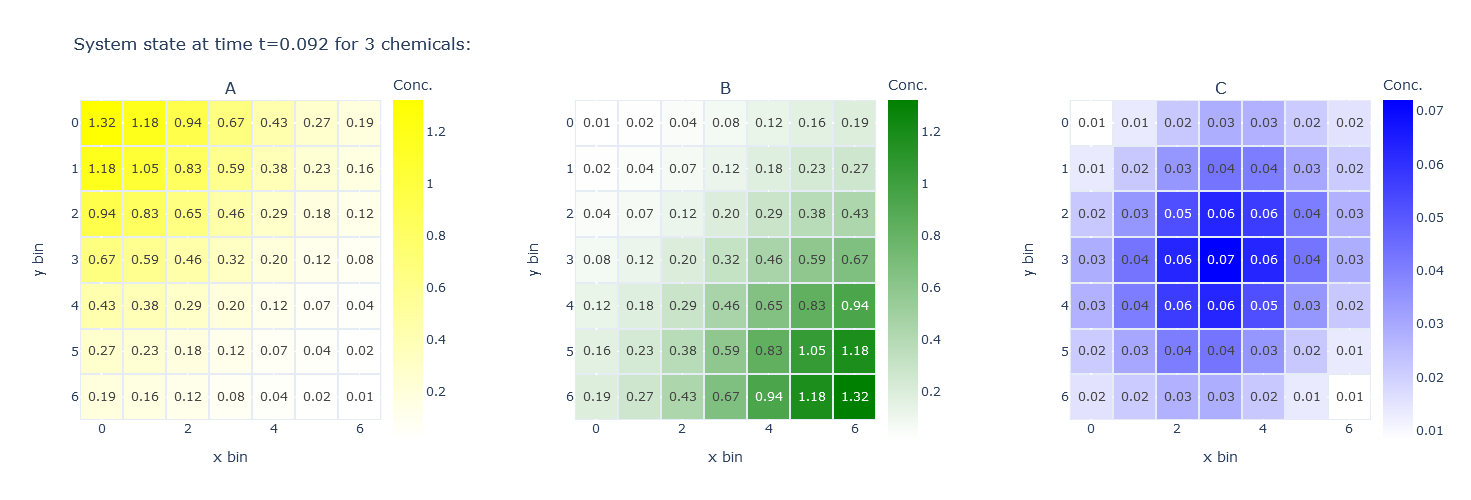

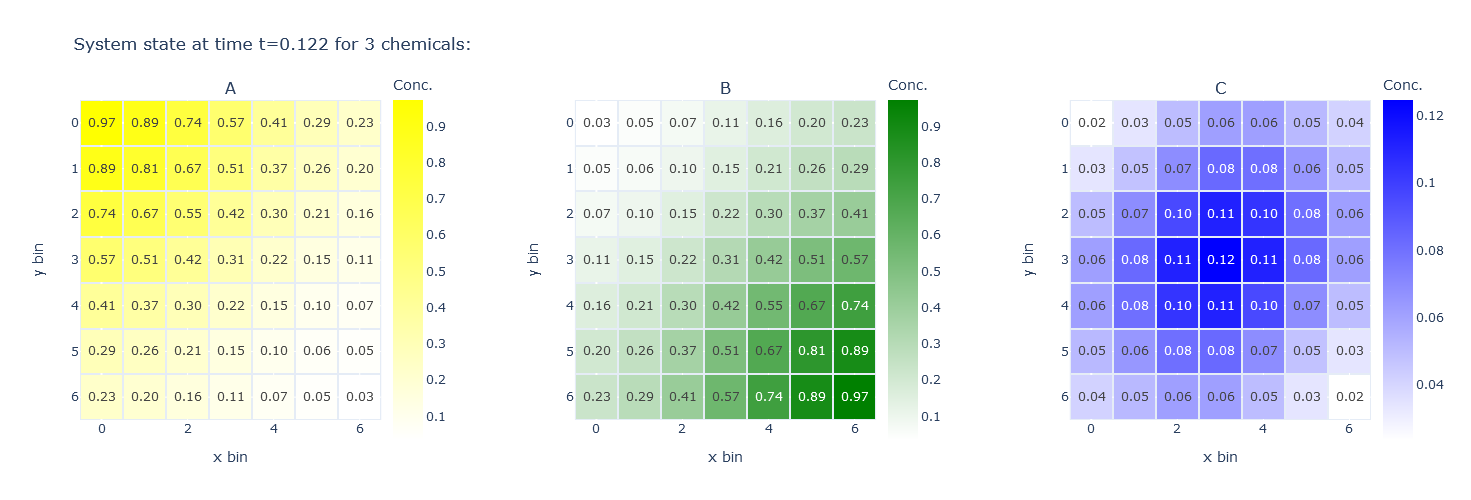

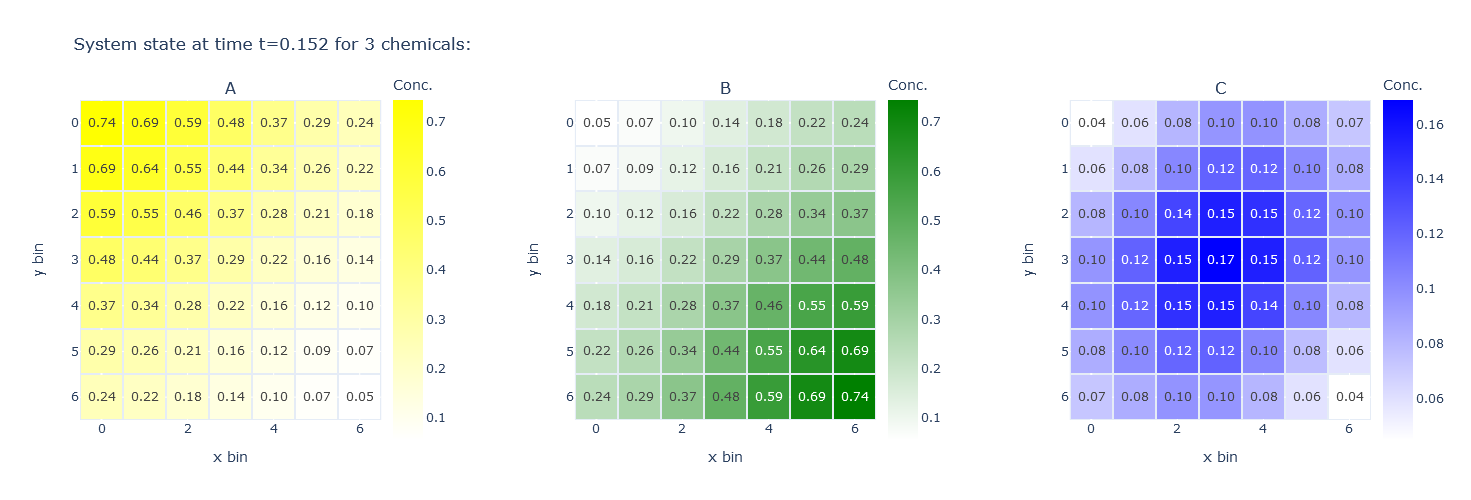

In [17]:
# Continue with a few larger steps
for _ in range(5):
    bio.react_diffuse(total_duration=0.03, n_steps=50)
    fig = bio.system_heatmaps()
    fig.show()

### Part 3 : advance the diffusion/reaction to equilibrium

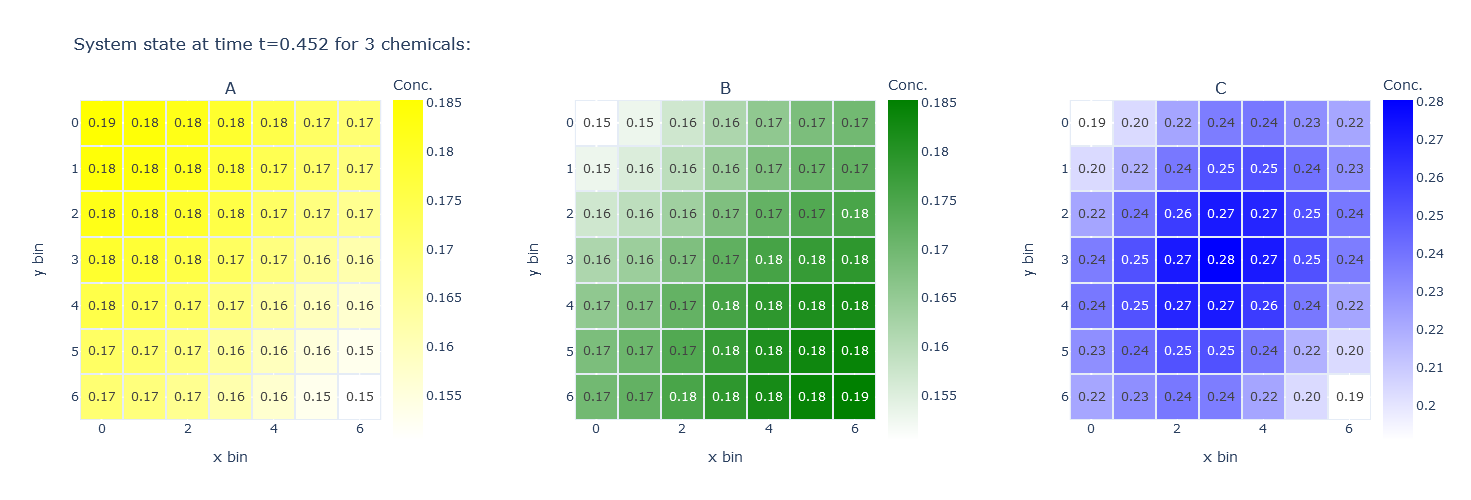

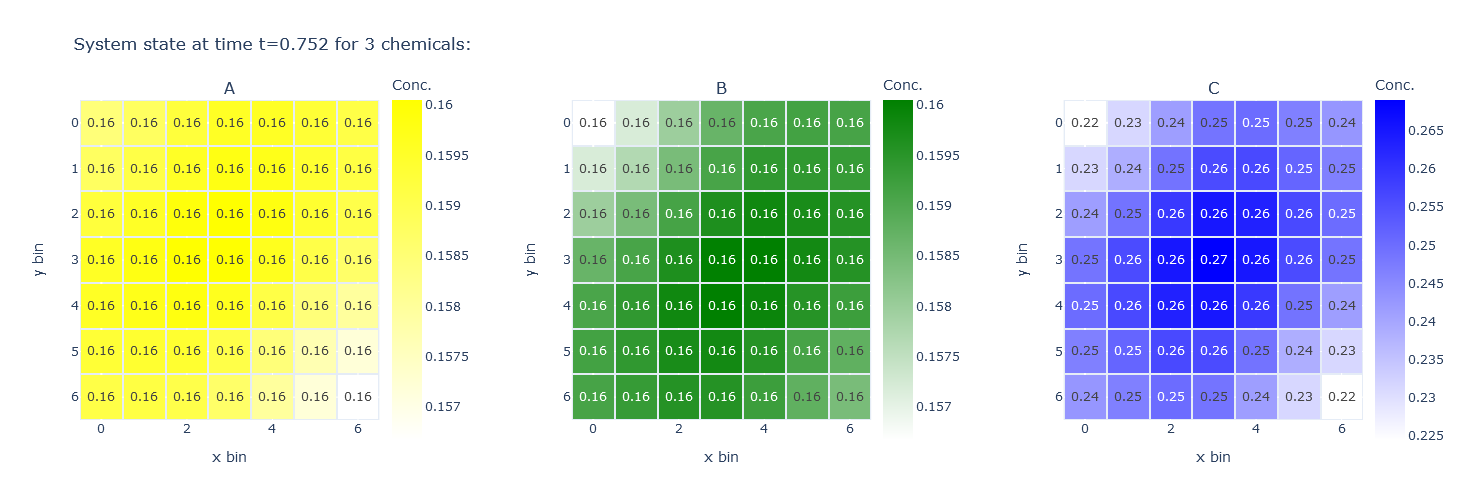

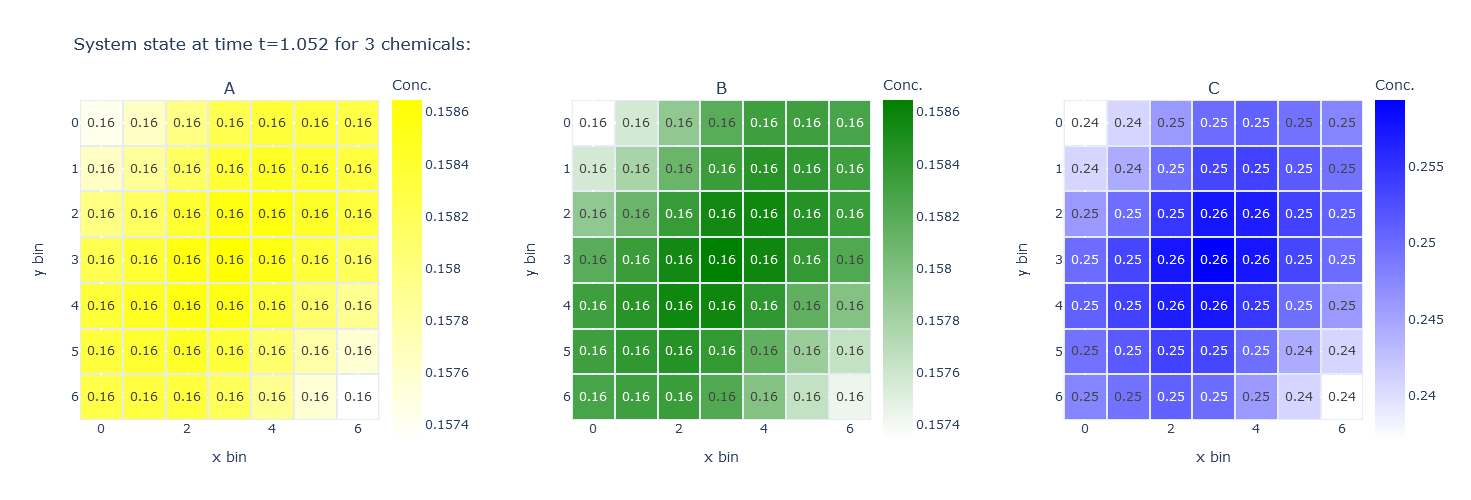

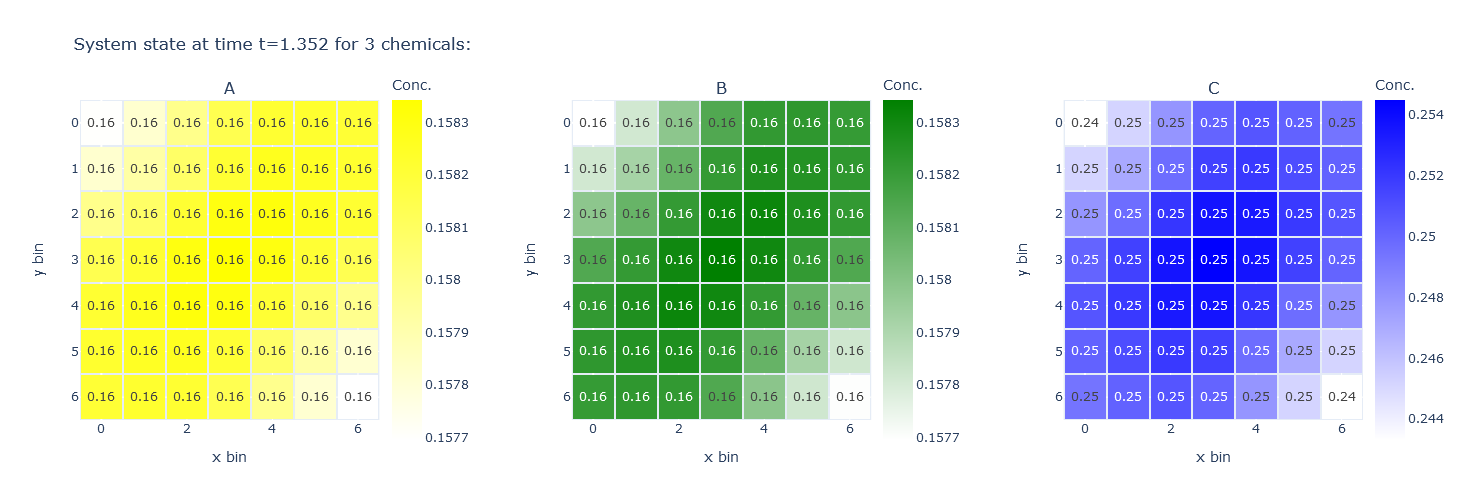

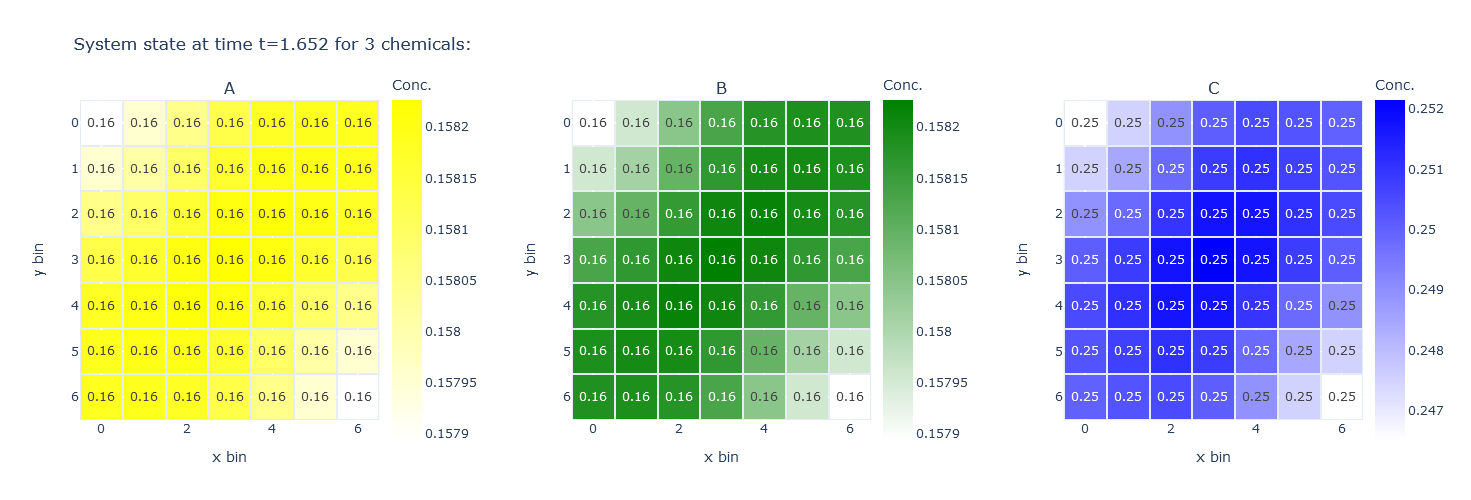

In [18]:
# Continue with a more even larger steps steps
for _ in range(5):
    bio.react_diffuse(total_duration=0.3, n_steps=500)
    fig = bio.system_heatmaps()
    fig.show()

In [19]:
# The number of historical snapshots we have accumulated
len(bio.conc_history.history)

2761

In [20]:
# Let's plot the concentration histories of all chemicals in the central bin
df = bio.conc_history.bin_history(bin_address = (3,3))
df

SYSTEM TIME         A         B         C
0          0.0000  0.000000  0.000000  0.000000
1          0.0002  0.000000  0.000000  0.000000
2          0.0004  0.000000  0.000000  0.000000
3          0.0006  0.000000  0.000000  0.000000
4          0.0008  0.000000  0.000000  0.000000
...           ...       ...       ...       ...
2756       1.6496  0.158227  0.158227  0.252158
2757       1.6502  0.158227  0.158227  0.252154
2758       1.6508  0.158226  0.158226  0.252151
2759       1.6514  0.158226  0.158226  0.252148
2760       1.6520  0.158226  0.158226  0.252145

[2761 rows x 4 columns]

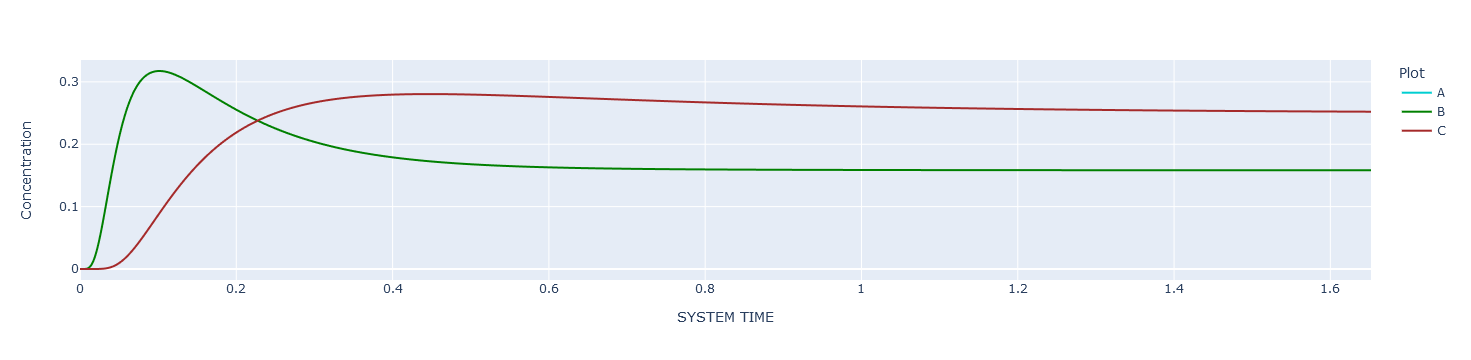

In [25]:
bio.plot_history_single_bin(bin_address = (3,3))

In [22]:
# And in one of the corner bins
df = bio.conc_history.bin_history(bin_address = (0,0))
df

SYSTEM TIME          A         B         C
0          0.0000  20.000000  0.000000  0.000000
1          0.0002  19.600000  0.000000  0.000000
2          0.0004  19.212000  0.000000  0.000000
3          0.0006  18.835560  0.000000  0.000000
4          0.0008  18.470258  0.000000  0.000000
...           ...        ...       ...       ...
2756       1.6496   0.157893  0.157893  0.246491
2757       1.6502   0.157893  0.157893  0.246495
2758       1.6508   0.157894  0.157893  0.246500
2759       1.6514   0.157894  0.157894  0.246504
2760       1.6520   0.157894  0.157894  0.246509

[2761 rows x 4 columns]

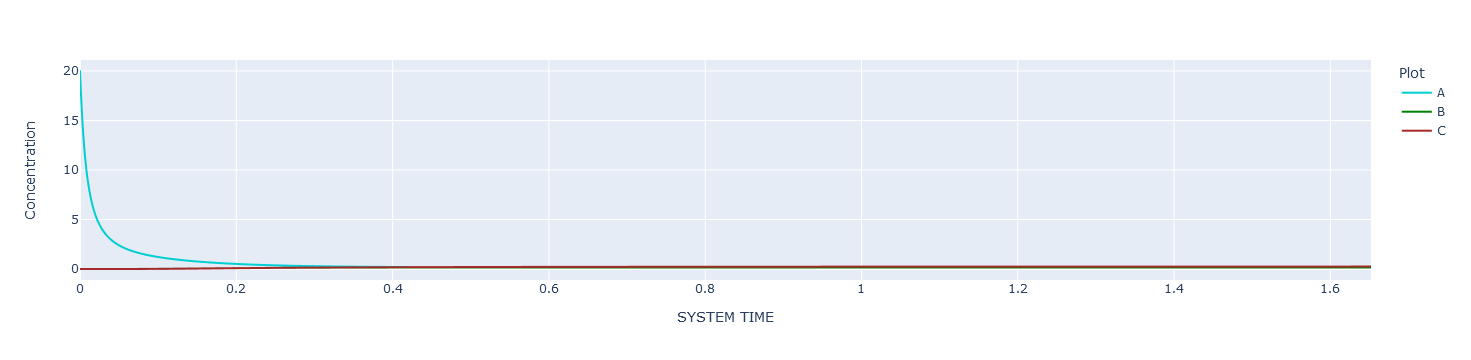

In [24]:
bio.plot_history_single_bin(bin_address = (0,0))